In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
class ElasticNet:

    def __init__(self, alpha=0.1, l1_ratio=0.1, learning_rate=0.01, max_iter=1000, tol=0.1, batch_size=64, seed=42, verbose=False) -> None:
        
        np.random.seed(seed)
        self.alpha = alpha
        self.l1_ratio = l1_ratio
        self.m, self.n = None, None
        self.verbose = verbose
        self.lr = learning_rate
        self.tol = tol
        self.max_iter = max_iter
        self.batch_size = batch_size
        self.loss = np.zeros(shape = (self.max_iter, ))
    

    def predict(self, X):

        if self.m is None:

            self.m = X.shape[0]
        
        X = np.hstack((np.ones((self.m, 1)), X))
    
        return np.dot(X, self.coefs_)
    

    def batch_generator(self, X, y, batch_size):

        indices = np.arange(self.m)
        np.random.shuffle(indices)

        for start in np.arange(0, self.m, batch_size):

            end = min(start + batch_size, self.m)
            yield X[start : end], y[start : end]
    

    def fit(self, X, y):

        self.m, self.n = X.shape
        X = np.hstack((np.ones((self.m, 1)), X))

        if y.ndim == 1:

            self.coefs_ = np.random.uniform(-0.5, 0.5, size = (self.n + 1, ))
        
        else:

            self.coefs_ = np.random.uniform(-0.5, 0.5, size = (self.n + 1, 1))
        

        for e in np.arange(self.max_iter):

            total_loss = 0

            for x_batch, y_batch in self.batch_generator(X, y, self.batch_size):

                pred = np.dot(x_batch, self.coefs_)
                loss = np.mean(np.square(y_batch - pred)) / 2 + self.alpha * self.l1_ratio * np.sum(np.abs(self.coefs_[1:])) + \
                       self.alpha / 2 * (1 - self.l1_ratio) * np.sum(np.square(self.coefs_[1:]))
            
                total_loss += loss
                self.coefs_ -= self.lr * (-2 / self.batch_size) * np.dot(x_batch.T, y_batch - pred) + \
                               self.alpha * self.l1_ratio * np.sign(np.hstack(([0], self.coefs_[1:]))) + \
                               self.alpha * (1 - self.l1_ratio) * np.hstack(([0], self.coefs_[1:]))
            
            self.loss[e] = total_loss / (self.m / self.batch_size)

            if self.verbose:
                print(f"epoch {e}/{self.max_iter} -- loss {self.loss[e]:.2f}")

            if e >= 1 and np.abs(self.loss[e] - self.loss[e - 1]) < self.tol:

                break

epoch 0/1000 -- loss 3.25
3.250123938735102
epoch 1/1000 -- loss 2.88
0.3661089694765862
epoch 2/1000 -- loss 2.56
0.3216884152605144
epoch 3/1000 -- loss 2.28
0.28288365270145555
epoch 4/1000 -- loss 2.03
0.24896404615012546
epoch 5/1000 -- loss 1.81
0.219294380833994
epoch 6/1000 -- loss 1.62
0.19330259354153712
epoch 7/1000 -- loss 1.45
0.17056183525951796
epoch 8/1000 -- loss 1.30
0.1506399954844404
epoch 9/1000 -- loss 1.16
0.1331695062752416
epoch 10/1000 -- loss 1.05
0.1178381655497136
epoch 11/1000 -- loss 0.94
0.10437454724078243
epoch 12/1000 -- loss 0.85
0.09254256414291706
epoch 13/1000 -- loss 0.77
0.08213676957904148
epoch 14/1000 -- loss 0.69
0.07297827885774955
epoch 15/1000 -- loss 0.63
0.06488995267744202
epoch 16/1000 -- loss 0.57
0.057778452442582506
epoch 17/1000 -- loss 0.52
0.05150824664629228
epoch 18/1000 -- loss 0.47
0.04597162483729261
epoch 19/1000 -- loss 0.43
0.041078526834090634
epoch 20/1000 -- loss 0.40
0.03675031307219051
epoch 21/1000 -- loss 0.36
0.0

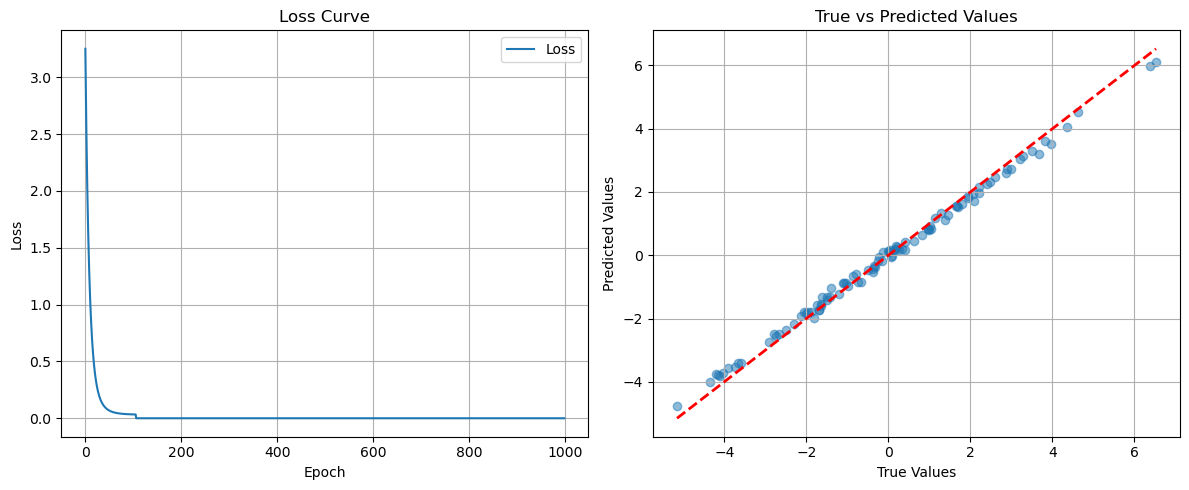

In [34]:
np.random.seed(42)  
n_samples = 100  
n_features = 10  


X = np.random.randn(n_samples, n_features)
true_coefs = np.random.randn(n_features)
y = X.dot(true_coefs) + np.random.randn(n_samples) * 0.1 


model = ElasticNet(alpha=0.001, l1_ratio=0.005, learning_rate=0.01, max_iter=1000, tol=1e-4, batch_size=32, verbose=True)
model.fit(X, y)
y_pred = model.predict(X)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  
plt.plot(np.arange(model.max_iter), model.loss, label="Loss")
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2) 
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  
plt.title("True vs Predicted Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.grid(True)

plt.tight_layout()
plt.show()